In [27]:
import os
import pandas as pd
import matplotlib.pyplot as mpl

In [2]:
scoring = pd.read_pickle(os.path.join('dataset01', 'scoring_merged.pickle'))
team_splits = pd.read_pickle(os.path.join('dataset01', 'team_splits_merged.pickle'))

In [9]:
scoring.shape

(28616, 17)

In [4]:
team_splits.head()

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks
4,1980,COR,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,...,NaN,4.0,9.0,1.0,NaN,0.0,1.0,2.0,NaN,Colorado Rockies


In [5]:
three_years = scoring.loc[(scoring.year > 2000) & (scoring.year < 2004)]
three_years

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
10,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal,abidra01,2002,PIT,3.0,0.0,0.0,0.0,7.0
11,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,Craig,Adams,R,1977.0,4.0,26.0,Brunei Darussalam,NaN,Seria,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,Craig,Adams,R,1977.0,4.0,26.0,Brunei Darussalam,NaN,Seria,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28608,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2001,TBL,9.0,0.0,2.0,2.0,14.0
28609,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2001,NJD,38.0,1.0,2.0,3.0,47.0
28610,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2002,NJD,1.0,0.0,1.0,1.0,0.0
28611,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2002,MIN,66.0,4.0,12.0,16.0,113.0


In [6]:
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])
three_years

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
11,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,Craig,Adams,R,1977.0,4.0,26.0,Brunei Darussalam,NaN,Seria,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,Craig,Adams,R,1977.0,4.0,26.0,Brunei Darussalam,NaN,Seria,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
41,Craig,Adams,R,1977.0,4.0,26.0,Brunei Darussalam,NaN,Seria,adamscr01,2003,CAR,80.0,7.0,10.0,17.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28585,Dainius,Zubrus,R,1978.0,6.0,16.0,Lithuania,NaN,Elektrenai,zubruda01,2002,WAS,63.0,13.0,22.0,35.0,104.0
28586,Dainius,Zubrus,R,1978.0,6.0,16.0,Lithuania,NaN,Elektrenai,zubruda01,2003,WAS,54.0,12.0,15.0,27.0,115.0
28608,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2001,TBL,9.0,0.0,2.0,2.0,14.0
28610,Andrei,Zyuzin,D,1978.0,1.0,21.0,Russia,NaN,Ufa,zyuzian01,2002,NJD,1.0,0.0,1.0,1.0,0.0


In [8]:
counts = three_years['playerID'].value_counts()
counts

lessafr01    3
liljaan01    3
matviri01    3
maybr01      3
mayerja01    3
            ..
divisto01    1
nasreal01    1
domero01     1
myrvoan01    1
payerse01    1
Name: playerID, Length: 1320, dtype: int64

In [12]:
ids = counts[counts == 3].sample(3).index
ids

Index(['lessafr01', 'afinoma01', 'gomezsc01'], dtype='object')

In [15]:
df3 = three_years.loc[three_years['playerID'].isin(ids)]
df3
b_df3 = df3[['playerID', 'year', 'G']]
b_df3

,playerID,year,G
111,afinoma01,2001,21.0
112,afinoma01,2002,5.0
113,afinoma01,2003,17.0
8671,gomezsc01,2001,10.0
8672,gomezsc01,2002,13.0
8673,gomezsc01,2003,14.0
14577,lessafr01,2001,0.0
14578,lessafr01,2002,0.0
14579,lessafr01,2003,1.0


In [17]:
pivot = b_df3.pivot(index='playerID', columns='year', values='G')
pivot

year,2001,2002,2003
playerID,,,
afinoma01,21.0,5.0,17.0
gomezsc01,10.0,13.0,14.0
lessafr01,0.0,0.0,1.0


In [18]:
pivot.index

Index(['afinoma01', 'gomezsc01', 'lessafr01'], dtype='object', name='playerID')

In [19]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [20]:
type(pivot)

pandas.core.frame.DataFrame

In [21]:
pivot.index.name = None
pivot

year,2001,2002,2003
afinoma01,21.0,5.0,17.0
gomezsc01,10.0,13.0,14.0
lessafr01,0.0,0.0,1.0


In [22]:
pivot.columns.name = None
pivot

,2001,2002,2003
afinoma01,21.0,5.0,17.0
gomezsc01,10.0,13.0,14.0
lessafr01,0.0,0.0,1.0


In [23]:
pivot.index.name = 'playerID'
pivot.columns.name = 'year'
pivot

year,2001,2002,2003
playerID,,,
afinoma01,21.0,5.0,17.0
gomezsc01,10.0,13.0,14.0
lessafr01,0.0,0.0,1.0


<AxesSubplot: xlabel='playerID'>

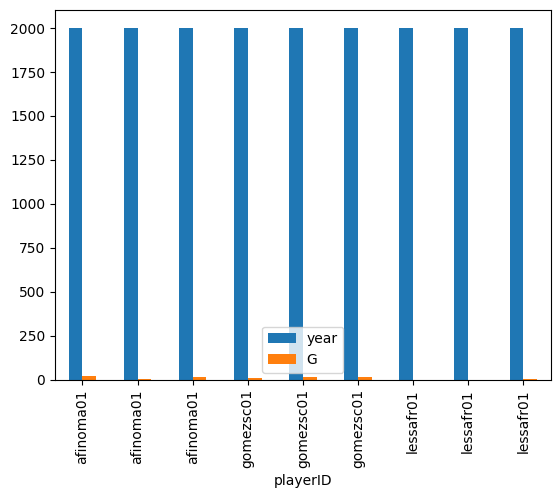

In [28]:
b_df3.set_index('playerID').plot.bar()

<AxesSubplot: xlabel='playerID'>

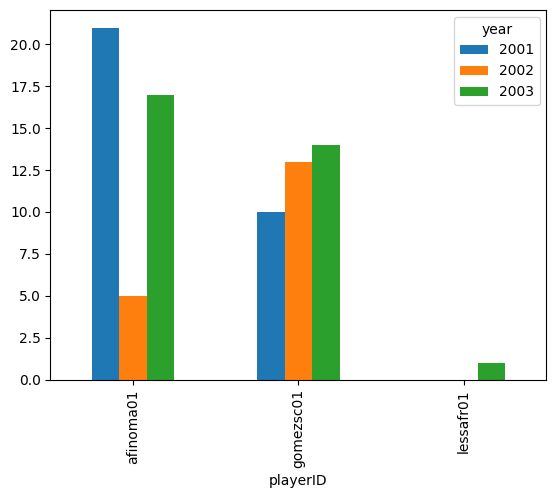

In [29]:
pivot.plot.bar()

<AxesSubplot: >

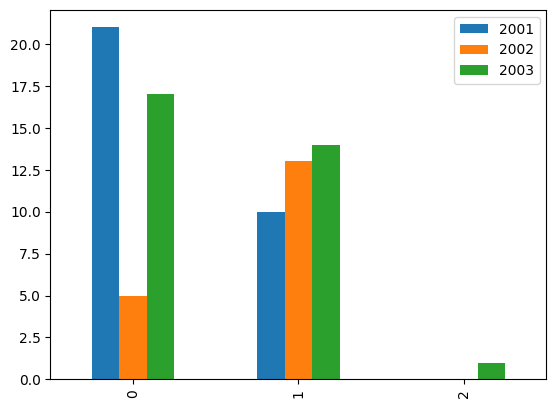

In [30]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot.plot.bar()

In [31]:
pivot.melt()

,variable,value
0,playerID,afinoma01
1,playerID,gomezsc01
2,playerID,lessafr01
3,2001,21.0
4,2001,10.0
5,2001,0.0
6,2002,5.0
7,2002,13.0
8,2002,0.0
9,2003,17.0


In [36]:
pivot.melt(id_vars='playerID', var_name='year', value_vars=[2001,2002], value_name='goals')

,playerID,year,goals
0,afinoma01,2001,21.0
1,gomezsc01,2001,10.0
2,lessafr01,2001,0.0
3,afinoma01,2002,5.0
4,gomezsc01,2002,13.0
5,lessafr01,2002,0.0


In [37]:
h_df3 = df3[['playerID', 'tmID', 'year', 'G']]
h_df3

,playerID,tmID,year,G
111,afinoma01,BUF,2001,21.0
112,afinoma01,BUF,2002,5.0
113,afinoma01,BUF,2003,17.0
8671,gomezsc01,NJD,2001,10.0
8672,gomezsc01,NJD,2002,13.0
8673,gomezsc01,NJD,2003,14.0
14577,lessafr01,ATL,2001,0.0
14578,lessafr01,ATL,2002,0.0
14579,lessafr01,ATL,2003,1.0


In [38]:
h_df3.pivot(index=['playerID', 'tmID'], columns='year', values='G')

,year,2001,2002,2003
playerID,tmID,,,
afinoma01,BUF,21.0,5.0,17.0
gomezsc01,NJD,10.0,13.0,14.0
lessafr01,ATL,0.0,0.0,1.0


In [39]:
h_df3 = df3[['playerID', 'year', 'G', 'A']]

In [40]:
h_df3.pivot(index=['playerID'], columns='year', values=['G', 'A'])

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
afinoma01  21.0   5.0  17.0  19.0   6.0  14.0
gomezsc01  10.0  13.0  14.0  38.0  42.0  56.0
lessafr01   0.0   0.0   1.0   0.0   2.0   1.0